### Training Process in LLM 

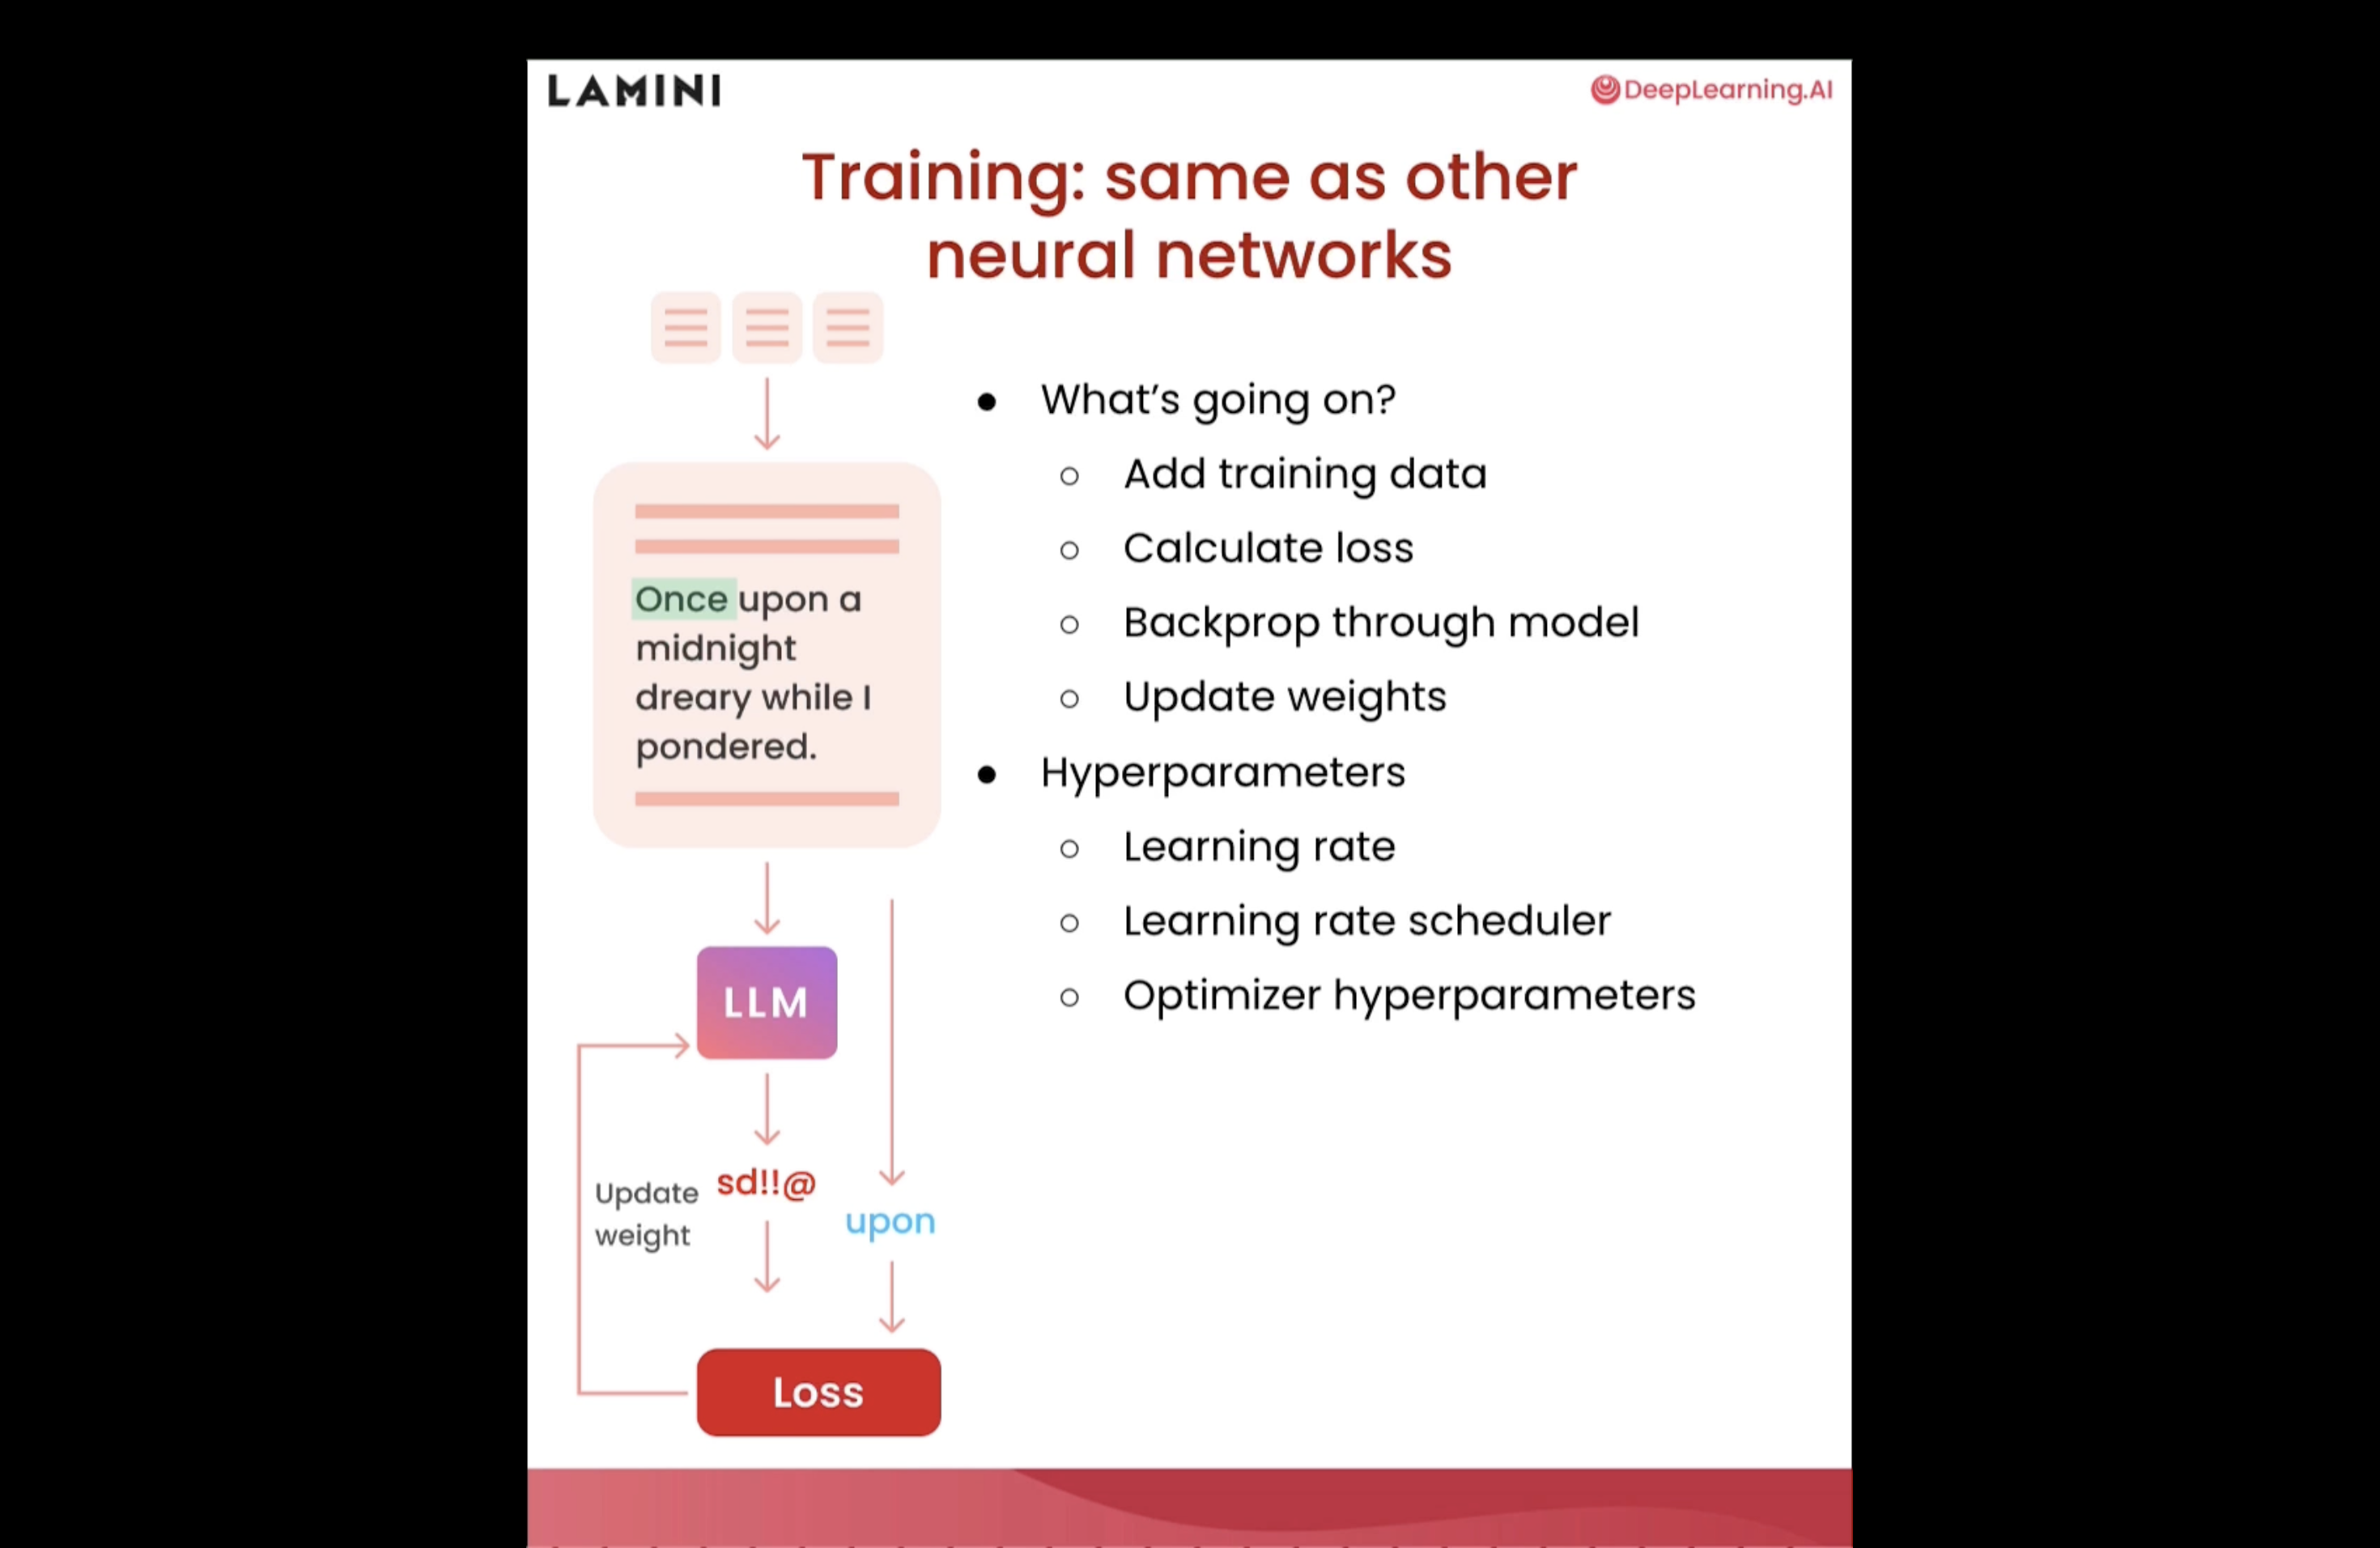

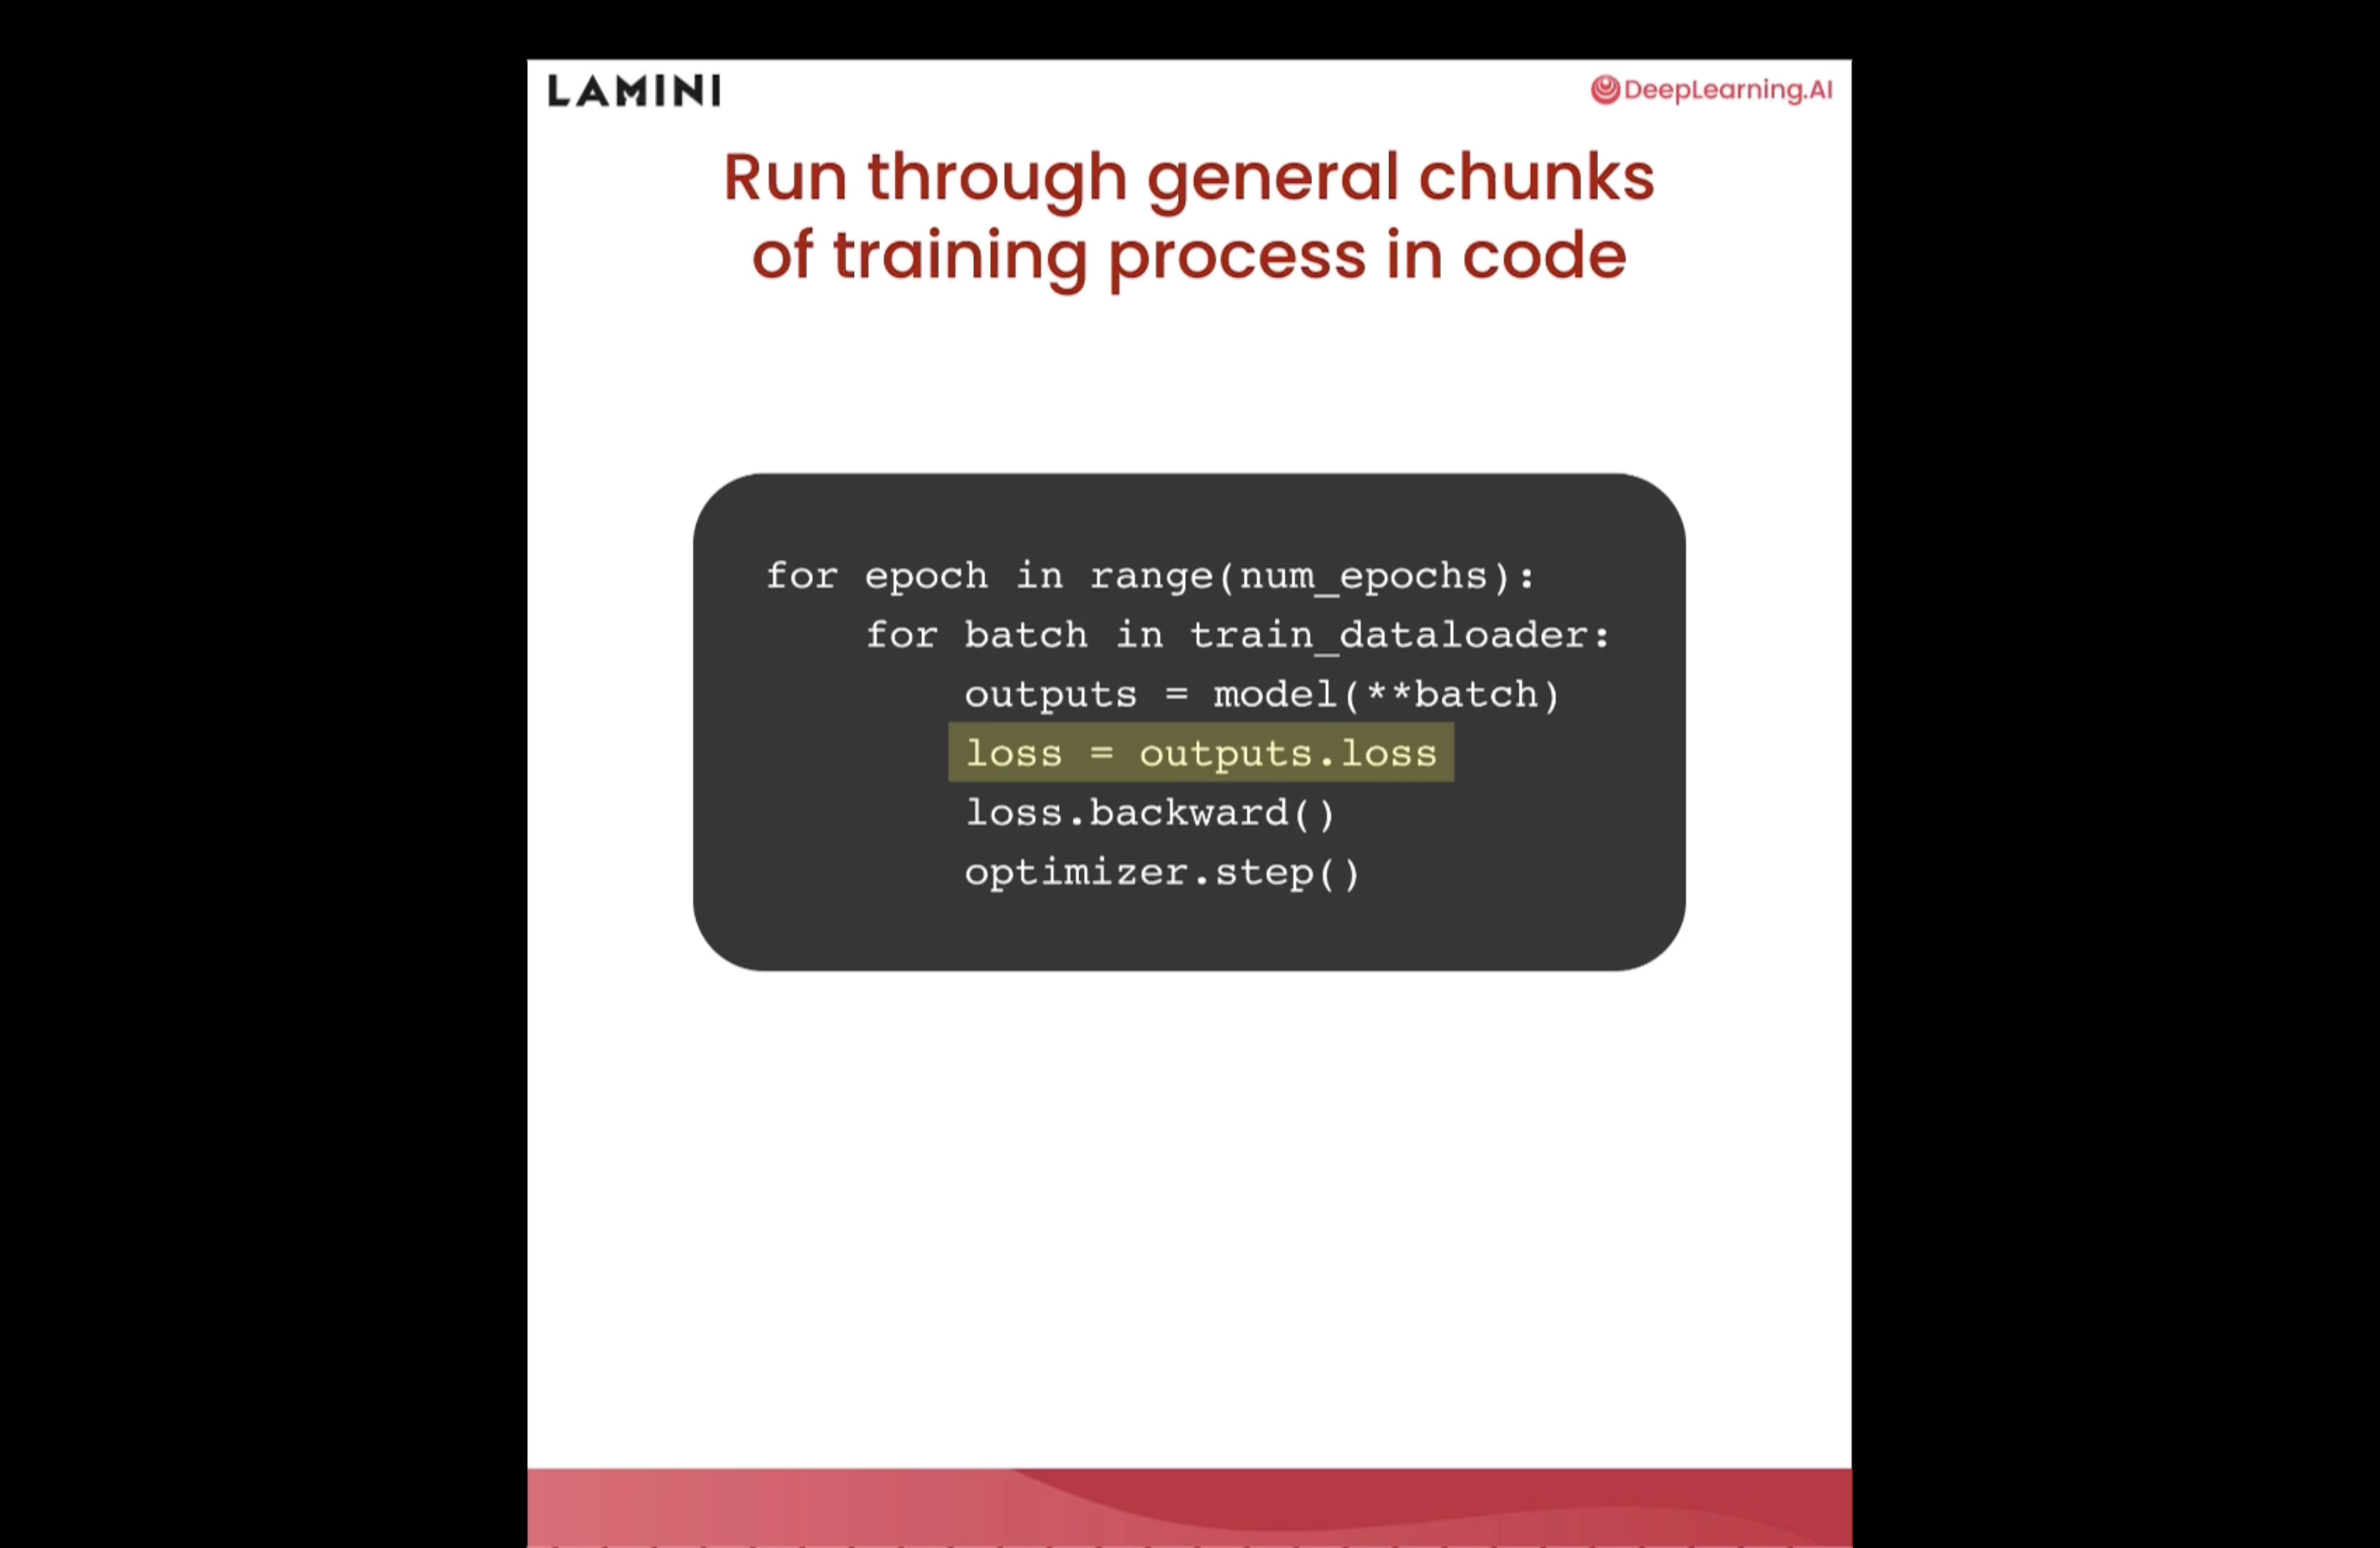

Now we will see training process using HuggingFace and LLAMA : 

## Technically, it's only a few lines of code to run on GPUs (elsewhere, ie. on Lamini).
```
from llama import BasicModelRunner

model = BasicModelRunner("EleutherAI/pythia-410m") 
model.load_data_from_jsonlines("lamini_docs.jsonl", input_key="question", output_key="answer")
model.train(is_public=True) 


```
1. Choose base model.
2. Load data.
3. Train it. Returns a model ID, dashboard, and playground interface.

### Let's look under the hood at the core code running this! This is the open core of Lamini's `llama` library :)


In [2]:
import datasets
import tempfile
import logging
import random
import config
import os
import yaml
import time
import torch
import transformers
import pandas as pd
import jsonlines
import lamini

#from utilities import *
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM
from transformers import TrainingArguments
from transformers import AutoModelForCausalLM
from llama import BasicModelRunner
import datasets
lamini.api_key = os.environ["LAMINI_KEY"]


logger = logging.getLogger(__name__)
global_config = None

/Users/mfho-27019739/Desktop/AIML/Github/LLM/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
dataset_name = "lamini_docs.jsonl"
dataset_path = f"/content/{dataset_name}"
use_hf = False ## Use hugging face
dataset_path = "lamini/lamini_docs"
use_hf = True

In [3]:
finetuning_dataset_path = "lamini/lamini_docs"
finetuning_dataset = datasets.load_dataset(finetuning_dataset_path)
print(finetuning_dataset)

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1260
    })
    test: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 140
    })
})


### Set up the model, training config, and tokenizer

In [5]:
model_name = "EleutherAI/pythia-70m"
training_config = {
    "model": {
        "pretrained_name": model_name,
        "max_length" : 2048
    },
    "datasets": {
        "use_hf": use_hf,
        "path": dataset_path
    },
    "verbose": True
}
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
train_dataset, test_dataset = tokenize_and_split_data(training_config, tokenizer)

print(train_dataset)
print(test_dataset)

NameError: name 'tokenize_and_split_data' is not defined